#CIFAR-10 데이터 32*32사이즈 3072 DIMENSIONS
#TRAIN SET 50000 TEST SET 10000
#CLASS당 6000개

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib


0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache direc

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
import os
import shutil
import random
import glob
import time

In [ ]:
# 파이토치 관련 라이브러리

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.utils import save_image
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [ ]:
# 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


0.5 0.5 0.5 변경가능합니다. CIFAR-10의 평균과 편차 ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) 

In [ ]:
import augmix.augmentations as A
import augmix.augmix as AM

ModuleNotFoundError: ignored

224*224 사이즈(efficientnet) - PRO에서도 불가능합니다.

In [ ]:
# 학습 데이터셋을 위한 변환기
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기를 224x224로 변경
    transforms.RandomCrop(224, padding=4),  # 이미지를 무작위로 잘라내기
    transforms.RandomHorizontalFlip(),  # 이미지를 무작위로 좌우 반전시키기
    transforms.ToTensor(),  # 이미지를 텐서로 변환하기
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # 이미지를 정규화하기
])

# 테스트 데이터셋을 위한 변환기
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기를 224x224로 변경
    transforms.ToTensor(),  # 이미지를 텐서로 변환하기
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # 이미지를 정규화하기
])


32*32사이즈(resnet/drn)

In [ ]:
# 학습 데이터셋을 위한 변환기
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # 이미지를 무작위로 잘라내기
    transforms.RandomHorizontalFlip(),  # 이미지를 무작위로 좌우 반전시키기
#    transforms.Resize(32),  # 이미지 크기를 32x32로 변경하기
    transforms.ToTensor(),  # 이미지를 텐서로 변환하기
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))   # 이미지를 정규화하기
])

# 테스트 데이터셋을 위한 변환기
test_transform = transforms.Compose([
#    transforms.Resize(32),  # 이미지 크기를 32x32로 변경하기
    transforms.ToTensor(),  # 이미지를 텐서로 변환하기
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))   # 이미지를 정규화하기
])

In [ ]:
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)


testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)


#validset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
#valid_loader = torch.utils.data.DataLoader(validset, batch_size=128, shuffle=True, num_workers=0)


#NUM_WORKER = 작업자의 수/  NUM_WORKER 값을 증가시키면 CNN의 작업 처리 속도가 향상 /병렬
#BUT, 너무 크다면, 시스템 자원의 한계로 인해 경쟁 발생 - > 속도 지연.

Files already downloaded and verified
Files already downloaded and verified


https://blog.testworks.co.kr/importance_of_gan_in_ai_dataset_building/

#이미지 증강 기법은 다양성의 차이 데이터수는 고정이며, 데이터 보강 기법은 데이터를 보강하며, 이미지의 구조와 특징을 재구성하여 생성함.

#CGAN ( Convolutional Generative Adversarial Network) (EPOCH 104부터 과적합 발생)


#- 돌릴 필요 없음. 결과 안좋아서 삭제.

https://jksronline.org/pdf/10.3348/jksr.2020.0158


https://deep-learning-study.tistory.com/640

https://ddongwon.tistory.com/126


64*64를 쓰기 때문에, 기존 데이터셋에 합칠 경우 32*32변환을 해줘야함.

In [ ]:
from torchvision.datasets import CIFAR10
from torchvision.utils import save_image


# 하이퍼파라미터 설정
latent_size = 100
hidden_size = 64
image_size = 64
num_epochs = 103
batch_size = 128
sample_dir = "C:/Users/DESKTOP/Desktop"


# 변환기(transforms) 설정
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),  # 이미지 크기 변경
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# CIFAR-10 데이터셋 다운로드
cifar_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)

# 데이터로더 설정
data_loader = DataLoader(dataset=cifar_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# 생성자 클래스 정의
class Generator(nn.Module):
    def __init__(self, latent_size, hidden_size, image_size):
        super(Generator, self).__init__()
        self.latent_size = latent_size
        self.hidden_size = hidden_size
        self.image_size = image_size
        
        self.main = nn.Sequential(
            nn.ConvTranspose2d(self.latent_size, self.hidden_size * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(self.hidden_size * 8),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(self.hidden_size * 8, self.hidden_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.hidden_size * 4),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(self.hidden_size * 4, self.hidden_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.hidden_size * 2),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(self.hidden_size * 2, self.hidden_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.hidden_size),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(self.hidden_size, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.main(x)

# 판별자 클래스 정의
class Discriminator(nn.Module):
    def __init__(self, hidden_size, image_size):
        super(Discriminator, self).__init__()
        self.hidden_size = hidden_size
        self.image_size = image_size
        
        self.main = nn.Sequential(
            nn.Conv2d(3, self.hidden_size, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(self.hidden_size, self.hidden_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.hidden_size * 2),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(self.hidden_size * 2, self.hidden_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.hidden_size * 4),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(self.hidden_size * 4, self.hidden_size * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.hidden_size * 8),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(self.hidden_size * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.main(x).view(-1, 1)

In [ ]:
# 생성자와 판별자 초기화
generator = Generator(latent_size, hidden_size, image_size).to(device)
discriminator = Discriminator(hidden_size, image_size).to(device)

# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# 생성된 이미지를 저장할 폴더 생성
import os
os.makedirs(sample_dir, exist_ok=True)

# 진행 상황을 출력하는 헬퍼 함수
def progress_bar(current, total, prefix=""):
    percent = "{:.1f}".format(100 * (current / float(total)))
    filled_length = int(50 * current // total)
    bar = "#" * filled_length + "-" * (50 - filled_length)
    print(f"\r{prefix} |{bar}| {percent}% completed", end="\r")
    if current == total:
        print()


In [ ]:
# 훈련 시작
total_step = len(data_loader)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        batch_size = images.size(0)
        images = images.to(device)
        
        # 진짜 이미지에 대한 레이블
        real_labels = torch.ones(batch_size, 1).to(device)
        # 가짜 이미지에 대한 레이블
        fake_labels = torch.zeros(batch_size, 1).to(device)
        
        # 판별자 훈련
        # 진짜 이미지 판별
        outputs = discriminator(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = torch.mean(outputs).item()
        
        # 가짜 이미지 생성 및 판별
        z = torch.randn(batch_size, latent_size, 1, 1).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = torch.mean(outputs).item()
        
        # 판별자 손실 계산 및 역전파
        d_loss = d_loss_real + d_loss_fake
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()
        
        # 생성자 훈련
        # 가짜 이미지 생성 및 판별
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)
        
        # 생성자 손실 계산 및 역전파
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()
        
        # 진행 상황 출력
        progress_bar(i+1, total_step, f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], "
                                      f"Generator Loss: {g_loss.item():.4f}, Discriminator Loss: {d_loss.item():.4f}")
        
    # 에폭마다 생성된 이미지 저장
    with torch.no_grad():
        z = torch.randn(16, latent_size, 1, 1).to(device)
        fake_images = generator(z)
        fake_images = (fake_images + 1) / 2
        save_image(fake_images, os.path.join(sample_dir, f"generated_{epoch+1}.png"), nrow=4, normalize=True)

# 학습 완료 후 생성된 이미지 저장
with torch.no_grad():
    z = torch.randn(16, latent_size, 1, 1).to(device)
    fake_images = generator(z)
    fake_images = (fake_images + 1) / 2
    save_image(fake_images, os.path.join(sample_dir, "final_generated.png"), nrow=4, normalize=True)

print("Training completed!")

In [ ]:
from torchvision.transforms import ToTensor
from PIL import Image
import os
from torch.utils.data import TensorDataset

transform = ToTensor()

generated_images = []

# 디렉토리 내의 파일 목록을 확인하고 이미지 파일들을 로드하여 Tensor로 변환
for image_file in os.listdir(sample_dir):
    image_path = os.path.join(sample_dir, image_file)
    image = Image.open(image_path)
    image = transform(image)
    generated_images.append(image)

# 생성된 이미지 데이터를 TensorDataset으로 변환
generated_dataset = TensorDataset(*generated_images)


In [ ]:
import matplotlib.pyplot as plt

# 이미지를 크게 보여주기 위해 행과 열의 개수 설정
num_rows = 5
num_cols = 4

# 이미지를 그리드 형태로 시각화
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    if i < len(generated_images):
        image = generated_images[i].permute(1, 2, 0)  # 이미지의 차원 순서 변경 (C, H, W) -> (H, W, C)
        ax.imshow(image)
        ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from torchvision.transforms import ToTensor
from PIL import Image
import os
from torch.utils.data import TensorDataset

transform = ToTensor()

generated_images = []

# 디렉토리 내의 파일 목록을 확인하고 이미지 파일들을 로드하여 Tensor로 변환
for image_file in os.listdir(sample_dir):
    image_path = os.path.join(sample_dir, image_file)
    image = Image.open(image_path)
    image = transform(image)
    generated_images.append(image)

# 생성된 이미지 데이터를 TensorDataset으로 변환
generated_dataset = TensorDataset(*generated_images)

#-> 결과 안좋아서 삭제.

#AUTOENCONDER - 이거 돌려야함

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define Autoencoder network
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 256),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 64 * 4 * 4),
            nn.ReLU(),
            nn.Unflatten(1, (64, 4, 4)),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
#           nn.Sigmoid()  # Tanh 대신 Sigmoid 사용
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
batch_size = 128
num_epochs = 300
learning_rate = 0.001

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize Autoencoder
autoencoder = Autoencoder().cuda()

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

#optimizer = optim.SGD(autoencoder.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_dataloader):
        images = images.cuda()

        # Forward pass
        reconstructed = autoencoder(images)
        loss = criterion(reconstructed, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every 100 steps
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}")

# Generate augmented data using the trained autoencoder
augmented_data = []
augmented_labels = []

for images, labels in train_dataloader:
    images = images.cuda()
    augmented_images = autoencoder(images).detach().cpu()
    augmented_data.append(augmented_images)
    augmented_labels.extend(labels)

augmented_data = torch.cat(augmented_data, dim=0)

# Save augmented data and labels
torch.save(augmented_data, "augmented_data.pt")
torch.save(augmented_labels, "augmented_labels.pt")



#RESNET 모델 사용 <_ 왜인지는 모르겠지만 로스가 줄어들지않으며 이미지 또한 검음

https://deepinsight.tistory.com/126

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18


# Define Autoencoder network
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 256),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 64 * 4 * 4),
            nn.ReLU(),
            nn.Unflatten(1, (64, 4, 4)),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
batch_size = 128
num_epochs = 20
learning_rate = 0.001

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize Autoencoder
autoencoder = Autoencoder().cuda()


# Pre-trained ResNet model
resnet_model = torchvision.models.resnet18(pretrained=True)
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1]).cuda()

# Loss functions
criterion_mse = nn.MSELoss()
criterion_structural = nn.L1Loss()
criterion_perceptual = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_dataloader):
        images = images.cuda()

        # Forward pass
        reconstructed = autoencoder(images)

        # Compute reconstruction loss
        loss_mse = criterion_mse(reconstructed, images)
        loss_structural = criterion_structural(reconstructed, images)

        # Compute Perceptual Loss
        features_reconstructed = resnet_model(reconstructed)
        features_original = resnet_model(images)
        loss_perceptual = criterion_perceptual(features_reconstructed, features_original)

        # Total loss
        loss = loss_mse + loss_structural + loss_perceptual

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every 100 steps
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}")

# Generate augmented data using the trained autoencoder
augmented_data = []
augmented_labels = []

for images, labels in train_dataloader:
    images = images.cuda()
    augmented_images = autoencoder(images).detach().cpu()
    augmented_data.append(augmented_images)
    augmented_labels.extend(labels)

augmented_data = torch.cat(augmented_data, dim=0)

# Save augmented data and labels
torch.save(augmented_data, "augmented_data.pt")
torch.save(augmented_labels, "augmented_labels.pt")


In [ ]:
# Save augmented labels
torch.save(augmented_labels, "augmented_labels.pt")

In [ ]:
# Load augmented data
augmented_data = torch.load("augmented_data.pt")
augmented_labels = torch.load("augmented_labels.pt")

In [ ]:
from torch.utils.data import ConcatDataset

# Create a custom dataset for augmented data
class AugmentedDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

    def __len__(self):
        return len(self.data)

In [ ]:
# Create augmented dataset
augmented_dataset = AugmentedDataset(augmented_data, augmented_labels)

# Concatenate augmented dataset with original CIFAR-10 dataset
new_train_dataset = ConcatDataset([train_dataset, augmented_dataset])

In [ ]:
# 데이터셋 확인
for i in range(len(augmented_dataset)):
    data, label = augmented_dataset[i]
    print(f"Data {i}: {data.shape}, Label: {label}")

In [ ]:
# Select a subset of samples to visualize
num_samples = 5
subset_indices = random.sample(range(len(augmented_dataset)), num_samples)

# Visualize augmented dataset samples
fig, axes = plt.subplots(1, num_samples, figsize=(12, 6))
for i, idx in enumerate(subset_indices):
    image, label = augmented_dataset[idx]
    image = image.permute(1, 2, 0)  # (C, H, W) -> (H, W, C)
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Select a subset of samples to visualize
num_samples = 5
subset_indices = random.sample(range(len(train_dataset)), num_samples)

# Visualize augmented dataset samples
fig, axes = plt.subplots(1, num_samples, figsize=(12, 6))
for i, idx in enumerate(subset_indices):
    image, label = augmented_dataset[idx]
    image = image.permute(1, 2, 0)  # (C, H, W) -> (H, W, C)
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(new_train_dataset, batch_size=128, shuffle=True, num_workers=2)

In [ ]:
def collate_fn(batch):
    data = torch.stack([item[0] for item in batch])
    labels = torch.tensor([item[1] for item in batch])
    return data, labels

# 데이터 로더 확인
train_loader = torch.utils.data.DataLoader(new_train_dataset, batch_size=128, shuffle=True, num_workers=2, collate_fn=collate_fn)


In [ ]:
# 데이터 로더 확인
for batch_idx, (data, label) in enumerate(train_loader):
    print(f"Batch {batch_idx}: {data.shape}, Labels: {label}")

In [ ]:
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

In [ ]:
len(new_train_dataset)

https://blog.naver.com/bossamb/222414965222
http://www.koreascience.or.kr/article/CFKO202232249421412.pdf

#CLASS 정의

In [ ]:
# 정답 라벨 정의
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
for i, class_name in enumerate(classes):
    print(i, class_name)

#데이터 미리 확인

In [ ]:
# 이미지와 라벨 표시
def show_images_labels(loader, classes, net, device):

    # 데이터로더에서 처음 1세트를 가져오기
    for images, labels in loader:
        break
    # 표시 수는 50개
    n_size = min(len(images), 50)

    if net is not None:
      # 디바이스 할당
      inputs = images.to(device)
      labels = labels.to(device)

      # 예측 계산
      outputs = net(inputs)
      predicted = torch.max(outputs,1)[1]
      #images = images.to('cpu')

    # 처음 n_size개 표시
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # net이 None이 아닌 경우는 예측 결과도 타이틀에 표시함
        if net is not None:
          predicted_name = classes[predicted[i]]
          # 정답인지 아닌지 색으로 구분함
          if label_name == predicted_name:
            c = 'k'
          else:
            c = 'b'
          ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # net이 None인 경우는 정답 라벨만 표시
        else:
          ax.set_title(label_name, fontsize=20)
        # 텐서를 넘파이로 변환
        image_np = images[i].numpy().copy()
        # 축의 순서 변경 (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # 값의 범위를[-1, 1] -> [0, 1]로 되돌림
        img = (img + 1)/2
        # 결과 표시
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()


In [ ]:
# 검증 데이터를 이미지로 표시

# 검증 데이터의 처음 50개를 출력
show_images_labels(test_loader, classes, None, None)

#데이터 증강 적용 이후 확인

In [ ]:
# 훈련 데이터의 처음 50개를 출력
show_images_labels(train_loader, classes, None, None)

In [ ]:
import torchvision

In [ ]:
# 데이터셋에서 이미지 샘플 하나를 가져옵니다.
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [ ]:
# 이미지 시각화를 위한 유틸리티 함수입니다.
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 이미지를 시각화합니다.
plt.figure(figsize=(30,30))
imshow(torchvision.utils.make_grid(images))

MODEL


#EfficientNet


한정된 자원으로 최대의 효율을 내기 위한 방법으로 model scaling(depth, width, resolution)

1.network의 depth를 깊게 만드는 것

2.channel width(filter 개수)를 늘리는 것(width가 넓을수록 미세한 정보가 많이 담아짐)

3.input image의 해상도를 올리는 것

Depth: 네트워크의 깊이가 증가할수록 모델의 capacity가 커지고 더 복잡한 feature를 잡아낼 수 있지만, vanishing gradient의 문제로 학습시키기가 더 어려워진다. 이를 해결하기 위해 Batch Norm, Residual Connection 등의 여러 기법들이 등장하였다.
Width: 각 레이어의 width를 키우면 정확도가 높아지지만 계산량이 제곱에 비례하여 증가한다.
Resolution: 입력 이미지의 해상도를 키우면 더 세부적인 feature를 학습할 수 있어 정확도가 높아지지만 마찬가지로 계산량이 제곱에 비례해 증가한다.



ResNet(ResNet-18, ResNet-50, ResNet-200)은 깊이를 달리 하였다.
MobileNets는 network width를 달리 하였다.




```



In [ ]:
import math


class Swish(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = x * torch.sigmoid(x)
        return x


class Mish(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = x * (torch.tanh(torch.nn.functional.softplus(x)))
        return x


class Conv_Bn_Activation(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, activation="linear", conv="Conv2d", groups=1, dilation=1, pool=1, bn=True, bias=False, UpSample=1, dropout=0):
        super().__init__()
        self.conv = nn.ModuleList()
        pad = (kernel_size - 1) // 2
        
        if conv == "Conv2d":
            if bias:
                self.conv.append(nn.Conv2d(in_channels, out_channels, kernel_size, stride, pad, groups=groups, dilation=dilation))
            else:
                self.conv.append(nn.Conv2d(in_channels, out_channels, kernel_size, stride, pad, groups=groups, dilation=dilation, bias=False))
        if bn:
            self.conv.append(nn.BatchNorm2d(out_channels, track_running_stats=False))
        if activation == "tanh":
            self.conv.append(nn.Tanh())
        elif activation == "sigmoid":
            self.conv.append(nn.Sigmoid())
        elif activation == "mish":
            self.conv.append(Mish())
        elif activation == "swish":
            self.conv.append(Swish())
        elif activation == "relu":
            self.conv.append(nn.ReLU(inplace=True))
        elif activation == "leaky":
            self.conv.append(nn.LeakyReLU(0.1, inplace=True))
        elif activation == "linear":
            pass
        else:
            print("activate error !!!")
        
        if dropout != 0:
            self.conv.append(nn.Dropout2d(p=dropout))
        if pool != 1:
            self.conv.append(nn.MaxPool2d(pool, pool))
            
    def forward(self, x):
        for l in self.conv:
            x = l(x)
        return x


class SEblock(nn.Module):
    def __init__(self, ch_in, ch_sq):
        super().__init__()
        self.module_list = nn.ModuleList()

        self.module_list.append(nn.AdaptiveAvgPool2d(1))
        self.module_list.append(nn.Conv2d(ch_in, ch_sq, 1))
        self.module_list.append(Swish())
        self.module_list.append(nn.Conv2d(ch_sq, ch_in, 1))

    def forward(self, x):
        orig_x = x
        for module in self.module_list:
            x = module(x)
        return orig_x * torch.sigmoid(x)


class DropConnect(nn.Module):
    def __init__(self, drop_rate):
        super().__init__()
        self.drop_rate = drop_rate

    def forward(self, x):
        if self.training:
            keep_rate = 1.0 - self.drop_rate
            mask = torch.rand_like(x) < keep_rate
            x = torch.div(x, keep_rate) * mask
        return x


class BMConvBlock(nn.Module):
    def __init__(self, ch_in, ch_out, expand_ratio, stride, kernel_size, reduction_ratio=4, drop_connect_rate=0.2):
        super().__init__()
        self.use_residual = (ch_in == ch_out) and (stride == 1)
        ch_med = int(ch_in * expand_ratio)
        ch_sq = max(1, ch_in // reduction_ratio)

        self.module_list = nn.ModuleList()
        if expand_ratio != 1.0:
            self.module_list.append(Conv_Bn_Activation(ch_in, ch_med, kernel_size=1, stride=1, activation='swish', groups=1))

        self.module_list.append(Conv_Bn_Activation(ch_med, ch_med, kernel_size=kernel_size, stride=stride, activation='swish', groups=ch_med))
        self.module_list.append(SEblock(ch_med, ch_sq))
        self.module_list.append(Conv_Bn_Activation(ch_med, ch_out, kernel_size=1, stride=1, activation='linear', groups=1))

        if self.use_residual:
            self.drop_connect = DropConnect(drop_connect_rate)

    def forward(self, x):
        orig_x = x
        for module in self.module_list:
            x = module(x)
        if self.use_residual:
            return orig_x + self.drop_connect(x)
        else:
            return x


class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)


class EfficientNet(nn.Module):
    def __init__(self, width_mult=1.0, depth_mult=1.0, resolution=32, dropout_rate=0.2, ch_in=3, num_classes=10):
        super().__init__()

        settings = [
            [1, 16, 1, 1, 3],  # MBConv1_3x3, SE, 32 -> 32
            [6, 24, 2, 2, 3],  # MBConv6_3x3, SE, 32 -> 16
            [6, 40, 2, 2, 5],  # MBConv6_5x5, SE, 16 -> 8
            [6, 80, 3, 2, 3],  # MBConv6_3x3, SE, 8 -> 4
            [6, 112, 3, 1, 5],  # MBConv6_5x5, SE, 4 -> 4
            [6, 192, 4, 2, 5],  # MBConv6_5x5, SE, 4 -> 2
            [6, 320, 1, 1, 3]  # MBConv6_3x3, SE, 2 -> 2
        ]

        ch_out = int(math.ceil(32 * width_mult))
        self.features = nn.ModuleList()
        self.features.append(Conv_Bn_Activation(ch_in, ch_out, kernel_size=3, stride=1, activation='swish', groups=1))

        ch_in = ch_out
        for t, c, n, s, k in settings:
            ch_out = int(math.ceil(c * width_mult))
            repeats = int(math.ceil(n * depth_mult))
            for i in range(repeats):
                stride = s if i == 0 else 1
                self.features.append(BMConvBlock(ch_in, ch_out, t, stride, k))
                ch_in = ch_out

        self.classifier = nn.ModuleList()
        self.classifier.append(nn.AdaptiveAvgPool2d(1))
        self.classifier.append(Flatten())
        self.classifier.append(nn.Dropout(dropout_rate))
        self.classifier.append(nn.Linear(ch_out, num_classes))

    def forward(self, x):
        for module in self.features:
            x = module(x)
        for module in self.classifier:
            x = module(x)
        return x


def efficientnet_cifar(width_mult=1.0, depth_mult=1.0, resolution=32, dropout_rate=0.2, num_classes=10):
    return EfficientNet(width_mult, depth_mult, resolution, dropout_rate, ch_in=3, num_classes=num_classes)


# CNN (RESNET-18/34/50)

BASICBLOCK은 입력과 출력의 차원이 동일
BASICBLOCK은 입력의 크기를 유지
두 개의 3x3 컨볼루션 레이어

BOTTLENECK은 BASICBLOCK보다 더 깊고 복잡한 구조를 가지며, 세 개의 컨볼루션 레이어로 구성
BOTTLENECK은 입력과 출력의 차원이 다르며, 출력 차원이 입력 차원의 4배
 세 개의 컨볼루션 레이어로 구성됩 (1x1, 3x3, 1x1)

BasicBlock 구조는 ResNet에서 기본적으로 사용되는 구조로, 두 개의 3x3 컨볼루션 레이어로 구성되어 있습니다. 이 구조는 입력 특성 맵의 크기를 유지하면서 학습 가능한 파라미터 수를 줄이고, 네트워크의 연산량을 감소시킵니다. BasicBlock은 ResNet-18 및 ResNet-34와 같은 작은 규모의 네트워크에 주로 사용됩니다.

Bottleneck 구조는 세 개의 컨볼루션 레이어로 구성되어 있으며, 1x1 컨볼루션, 3x3 컨볼루션, 1x1 컨볼루션의 순서로 연결됩니다. 이 구조는 1x1 컨볼루션 레이어를 통해 입력의 차원을 감소시키고, 3x3 컨볼루션 레이어에서 고수준의 특성을 추출한 후, 다시 1x1 컨볼루션 레이어를 통해 차원을 증가시킵니다. Bottleneck 구조는 ResNet-50 이상의 큰 규모의 네트워크에 주로 사용되며, 네트워크의 깊이를 증가시키는 데 도움을 줍니다.


Pretrained(x)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18(num_classes=10):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes)


def ResNet34(num_classes=10):
    return ResNet(BasicBlock, [3, 4, 6, 3], num_classes)


def ResNet50(num_classes=10):
    return ResNet(Bottleneck, [3, 4, 6, 3], num_classes)


def ResNet101(num_classes=10):
    return ResNet(Bottleneck, [3, 4, 23, 3], num_classes)


def ResNet152(num_classes=10):
    return ResNet(Bottleneck, [3, 8, 36, 3], num_classes)


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

test()


torch.Size([1, 10])


# DRN (Dilated Residual Network)




DRN-A: 이 구조는 기본 ResNet 구조를 기반으로 하며, 각 Residual Block 안에 dilated convolution을 적용합니다. 이 구조는 네트워크가 깊어질수록 레이어의 총 개수가 증가하는 특징이 있습니다.

DRN-B: DRN-A와 비슷한 구조를 가지고 있지만, 추가적인 dilated convolution 레이어를 추가하여 네트워크의 수용 필드(receptive field)를 확장합니다. 이 구조는 더 큰 컨텍스트 정보를 활용할 수 있어 성능을 향상시킬 수 있습니다.

DRN-C: DRN-C는 DRN-B에서 전체 네트워크의 깊이를 늘리는 방식으로 구성됩니다. 더 많은 레이어를 추가하여 특징 추출 및 컨텍스트 정보의 효과를 증가시킵니다. 그러나 더 많은 파라미터와 연산량이 필요하므로 계산 비용이 높아집니다.

각각의 DRN 구조는 네트워크의 성능과 효율성을 조정하기 위해 사용될 수 있습니다. 이 구조들은 다양한 컴퓨터 비전 태스크에 적용되며, 필요에 따라 선택할 수 있습니다.

In [ ]:
class DRNC26(nn.Module):
    def __init__(self, num_classes=10):
        super(DRNC26, self).__init__()
        # 첫 번째 convolution layer 정의
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        
        # Residual layer 1 정의
        self.layer1 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        )
        
        # Residual layer 2 정의
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        
        # Residual layer 3 정의
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )
        
        # Adaptive pooling layer 정의
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        # forward 연산 수행
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


    def get_activation_map(self, x):
        """
        입력 이미지를 모델에 입력하여 각 레이어의 activation map을 추출하는 함수
        Args:
            x: 모델에 입력할 이미지
        Returns:
            feature_maps: 각 레이어에서 추출된 feature map의 리스트
        """
        feature_maps = []
        # 입력 이미지를 모델에 입력하여 forward 연산 수행
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        feature_maps.append(x)
        x = self.layer1(x)
        feature_maps.append(x)
        x = self.layer2(x)
        feature_maps.append(x)
        x = self.layer3(x)
        feature_maps.append(x)
        return feature_maps

DRN-A:  Bottleneck 블록을 사용. 주로 대규모 이미지 분류나 객체 탐지 등의 고성능 비전 태스크에 적합

DRN-B: 더 깊은 네트워크 구조를 가지며, Bottleneck 블록을 사용. DRN-A보다 더 많은 층과 매개 변수를 가지며, 더 복잡한 특징을 학습

DRN-C: BasicBlock 블록을 사용.  DRN-A보다 더 작은 구조와 매개 변수. DRN-A와 비교하여 계산 및 메모리 요구 사항이 적으며, 더 경량화된 구조


DRN-D: DRN-C와 유사한 구조를 가지지만, 추가적인 확장 레벨을 포함. DRN-C보다 더 많은 층과 매개 변수를 가지며, 더 복잡한 특징을 학습


1. BasicBlock 블록은 두 개의 컨볼루션 레이어로 구성되어 있습니다. 보통 입력 차원과 출력 차원이 동일한 경우에 사용

 첫 번째 컨볼루션 레이어는 3x3 커널을 사용하고, 두 번째 컨볼루션 레이어는 동일한 3x3 커널을 사용




2. Bottleneck 블록은 세 개의 컨볼루션 레이어로 구성되어 있습니다. 입력 차원과 출력 차원 사이에 차원 축소를 위해 1x1 컨볼루션 레이어가 사용되고, 그 사이에 3x3 컨볼루션 레이어가 사용

출력 차원을 다시 확장하기 위해 1x1 컨볼루션 레이어가 사용됩니다. Bottleneck 블록은 모델의 복잡성을 높일 수 있으며, 더 깊은 네트워크에서 사용될 때 효과적







#DRN-BasicBlock 사용-C26의 구조를 차용하며 CIFAR-10에 맞게 변형

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms


def conv3x3(in_planes, out_planes, stride=1, padding=1, dilation=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=padding, bias=False, dilation=dilation)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None,
                 dilation=(1, 1), residual=True):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride,
                             padding=dilation[0], dilation=dilation[0])
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes,
                             padding=dilation[1], dilation=dilation[1])
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        self.residual = residual

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)
        if self.residual:
            out += residual
        out = self.relu(out)

        return out


class DRN(nn.Module):
    def __init__(self, block, layers, num_classes=10,
                 channels=(16, 32, 64, 128, 256, 512, 512, 512),
                 out_map=False, out_middle=False, pool_size=8, arch='D'):
        super(DRN, self).__init__()
        self.inplanes = channels[0]
        self.out_map = out_map
        self.out_dim = channels[-1]
        self.out_middle = out_middle
        self.arch = arch

        # 입력 채널 수가 3이고 출력 채널 수가 channels[0]인 3x3 합성곱 계층 정의
        self.conv1 = nn.Conv2d(3, channels[0], kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(channels[0])
        self.relu = nn.ReLU(inplace=True)

        # layer1부터 layer8까지의 레이어를 생성
        self.layer1 = self._make_layer(block, channels[0], layers[0], stride=1)
        self.layer2 = self._make_layer(block, channels[1], layers[1], stride=2)
        self.layer3 = self._make_layer(block, channels[2], layers[2], stride=2)
        self.layer4 = self._make_layer(block, channels[3], layers[3], stride=2)
        self.layer5 = self._make_layer(block, channels[4], layers[4], dilation=2)
        self.layer6 = self._make_layer(block, channels[5], layers[5], dilation=4)
        self.layer7 = self._make_layer(block, channels[6], layers[6], dilation=2, residual=False)
        self.layer8 = self._make_layer(block, channels[7], layers[7], dilation=1, residual=False)

        if num_classes > 0:
            # 평균 풀링 계층과 완전 연결 계층으로 구성된 분류기 생성
            self.avgpool = nn.AdaptiveAvgPool2d(1)
            self.fc = nn.Linear(self.out_dim, num_classes)

    def _make_layer(self, block, planes, blocks, stride=1, dilation=1, residual=True):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion)
            )

        layers = []
        # 블록을 반복하여 레이어 생성
        layers.append(block(self.inplanes, planes, stride, downsample,
                            dilation=(1, 1) if dilation == 1 else (dilation, dilation),
                            residual=residual))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, dilation=(dilation, dilation), residual=residual))

        return nn.Sequential(*layers)

    def forward(self, x):
        # 입력 이미지에 대한 합성곱 및 활성화 함수 적용
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        # 각 레이어에 순차적으로 통과
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)

        if self.out_map:
            # 출력 맵을 반환하는 경우 분류기로 전달
            x = self.fc(x)
        else:
            # 평균 풀링을 통해 공간 차원 축소
            x = self.avgpool(x)
            x = x.view(x.size(0), -1)
            x = self.fc(x)

        return x

#DRN- Bottleneck 사용 

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms


def conv3x3(in_planes, out_planes, stride=1, padding=1, dilation=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=padding, bias=False, dilation=dilation)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None,
                 dilation=(1, 1), residual=True):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride,
                             padding=dilation[0], dilation=dilation[0])
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes,
                             padding=dilation[1], dilation=dilation[1])
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        self.residual = residual

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)
        if self.residual:
            out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None,
                 dilation=(1, 1), residual=True):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=dilation[1], bias=False,
                               dilation=dilation[1])
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class DRN(nn.Module):
    def __init__(self, block, layers, num_classes=10,
                 channels=(16, 32, 64, 128, 256, 512, 512, 512),
                 out_map=False, out_middle=False, pool_size=8, arch='D'):
        super(DRN, self).__init__()
        self.inplanes = channels[0]
        self.out_map = out_map
        self.out_dim = channels[-1]
        self.out_middle = out_middle
        self.arch = arch

        self.conv1 = nn.Conv2d(3, channels[0], kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(channels[0])
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self._make_layer(block, channels[0], layers[0], stride=1)
        self.layer2 = self._make_layer(block, channels[1], layers[1], stride=2)
        self.layer3 = self._make_layer(block, channels[2], layers[2], stride=2)
        self.layer4 = self._make_layer(block, channels[3], layers[3], stride=2)
        self.layer5 = self._make_layer(block, channels[4], layers[4], dilation=2)
        self.layer6 = self._make_layer(block, channels[5], layers[5], dilation=4)

        if arch == 'D':
            self.layer7 = self._make_layer(block, channels[6], layers[6], dilation=2, residual=False)
            self.layer8 = self._make_layer(block, channels[7], layers[7], dilation=1, residual=False)

        if num_classes > 0:
            self.avgpool = nn.AdaptiveAvgPool2d(1)
            self.fc = nn.Linear(self.out_dim, num_classes)

    def _make_layer(self, block, planes, blocks, stride=1, dilation=1, residual=True):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion)
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample,
                            dilation=(1, 1) if dilation == 1 else (dilation, dilation),
                            residual=residual))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, dilation=(dilation, dilation), residual=residual))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)

        if self.arch == 'D':
            x = self.layer7(x)
            x = self.layer8(x)

        if self.out_map:
            x = self.fc(x)
        else:
            x = self.avgpool(x)
            x = x.view(x.size(0), -1)
            x = self.fc(x)

        return x


model = DRN(Bottleneck, [1, 1, 1, 1, 2, 2, 1, 1], num_classes=10)


#DRN-C-26는 4개의 블록을 가지는데, 각 블록의 구성은 [1, 1, 2, 2]

In [ ]:
import torch
import torch.nn as nn


def conv3x3(in_planes, out_planes, stride=1, padding=1, dilation=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=padding, bias=False, dilation=dilation)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None,
                 dilation=(1, 1), residual=True):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride,
                             padding=dilation[0], dilation=dilation[0])
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes,
                             padding=dilation[1], dilation=dilation[1])
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        self.residual = residual

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)
        if self.residual:
            out += residual
        out = self.relu(out)

        return out


class DRNC26(nn.Module):
    def __init__(self, num_classes=10):
        super(DRNC26, self).__init__()
        self.inplanes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=1, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self._make_layer(BasicBlock, 64, 1)
        self.layer2 = self._make_layer(BasicBlock, 128, 1, stride=2)
        self.layer3 = self._make_layer(BasicBlock, 256, 1, stride=2)
        self.layer4 = self._make_layer(BasicBlock, 512, 1, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * BasicBlock.expansion, num_classes)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion)
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

# 모델 인스턴스 생성
model = DRNC26(num_classes=10)

#학습함수(VALID사용)- 스케쥴러사용 x

In [ ]:
def train(model, optimizer, loss_fn, train_loader, valid_loader, epochs):
    
    since = time.time()
    train_loss_history = []
    train_acc_history = []
    valid_loss_history = []
    valid_acc_history = []
    best_train_acc = 0
    best_epoch = 0
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        
        for X, y_true in train_loader:
            X, y_true = X.to(device), y_true.to(device)
            optimizer.zero_grad()
            
            y_pred = model(X)
            loss = loss_fn(y_pred, y_true)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * X.size(0)
            train_correct += (y_pred.argmax(dim=1) == y_true).sum().item()
        
        train_loss /= len(train_loader.dataset)
        train_acc = train_correct / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)
        
        if train_acc > best_train_acc:
            best_train_acc = train_acc
            best_epoch = epoch

        # 가장 좋은 결과를 보인 모델의 파라미터 저장
        torch.save(model.state_dict(), 'best_model.pth')
    
        ### 평가 함수 정의 ###
        model.eval()
        valid_loss = 0
        valid_correct = 0
        
        with torch.no_grad():
            for X, y_true in valid_loader:
                X, y_true = X.to(device), y_true.to(device)
                y_pred = model(X)
                loss = loss_fn(y_pred, y_true)
                
                valid_loss += loss.item() * X.size(0)
                valid_correct += (y_pred.argmax(dim=1) == y_true).sum().item()
        
        valid_loss /= len(valid_loader.dataset)
        valid_acc = valid_correct / len(valid_loader.dataset)
        valid_loss_history.append(valid_loss)
        valid_acc_history.append(valid_acc)
            
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}")
        print(f"Valid Loss: {valid_loss:.4f} Acc: {valid_acc:.4f}")
        print('--'*15)
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f} / Best Epoch: {}'.format(best_train_acc, best_epoch+1))
    
    return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

#학습함수(VALID사용 X) 스케쥴러 CosineAnnealingLR 사용

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

# 학습 함수 정의
def train(model, optimizer, loss_fn, train_loader, test_loader, epochs):
    since = time.time()
    train_loss_history = []
    train_acc_history = []
    test_loss_history = []
    test_acc_history = []
    best_train_acc = 0
    best_epoch = 0

    # 스케쥴러 설정
    scheduler = CosineAnnealingLR(optimizer, T_max=200)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_correct = 0

        for X, y_true in train_loader:
            X, y_true = X.to(device), y_true.to(device)
            optimizer.zero_grad()

            y_pred = model(X)
            loss = loss_fn(y_pred, y_true)
            loss.backward()

            optimizer.step()

            train_loss += loss.item() * X.size(0)
            train_correct += (y_pred.argmax(dim=1) == y_true).sum().item()

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)

        if train_acc > best_train_acc:
            best_train_acc = train_acc
            best_epoch = epoch

        # 가장 좋은 결과를 보인 모델의 파라미터 저장
        torch.save(model.state_dict(), 'best_model.pth')

        # 평가 함수 정의
        model.eval()
        test_loss = 0
        test_correct = 0

        with torch.no_grad():
            for X, y_true in test_loader:
                X, y_true = X.to(device), y_true.to(device)
                y_pred = model(X)
                loss = loss_fn(y_pred, y_true)

                test_loss += loss.item() * X.size(0)
                test_correct += (y_pred.argmax(dim=1) == y_true).sum().item()

        test_loss /= len(test_loader.dataset)
        test_acc = test_correct / len(test_loader.dataset)
        test_loss_history.append(test_loss)
        test_acc_history.append(test_acc)

        # 스케쥴러 업데이트
        scheduler.step(epoch)

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}")
        print(f"Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")
        print('--' * 15)

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f} / Best Epoch: {}'.format(best_train_acc, best_epoch+1))

    return train_loss_history, train_acc_history, test_loss_history, test_acc_history

#학습함수(VALID사용 X) 스케쥴러 StepLR 사용





In [ ]:
def train(model, optimizer, loss_fn, train_loader, test_loader, epochs):
    since = time.time()
    train_loss_history = []
    train_acc_history = []
    test_loss_history = []
    test_acc_history = []
    best_train_acc = 0
    best_epoch = 0

    # 스케쥴러 설정
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_correct = 0

        for X, y_true in train_loader:
            X, y_true = X.to(device), y_true.to(device)
            optimizer.zero_grad()

            y_pred = model(X)
            loss = loss_fn(y_pred, y_true)
            loss.backward()
            
            optimizer.step()

            train_loss += loss.item() * X.size(0)
            train_correct += (y_pred.argmax(dim=1) == y_true).sum().item()

        train_loss /= len(train_loader.dataset)
        train_acc = train_correct / len(train_loader.dataset)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)

        if train_acc > best_train_acc:
            best_train_acc = train_acc
            best_epoch = epoch

        # 가장 좋은 결과를 보인 모델의 파라미터 저장
        torch.save(model.state_dict(), 'best_model.pth')

        ### 평가 함수 정의 ###
        model.eval()
        test_loss = 0
        test_correct = 0

        with torch.no_grad():
            for X, y_true in test_loader:
                X, y_true = X.to(device), y_true.to(device)
                y_pred = model(X)
                loss = loss_fn(y_pred, y_true)

                test_loss += loss.item() * X.size(0)
                test_correct += (y_pred.argmax(dim=1) == y_true).sum().item()

        test_loss /= len(test_loader.dataset)
        test_acc = test_correct / len(test_loader.dataset)
        test_loss_history.append(test_loss)
        test_acc_history.append(test_acc)

        # 스케쥴러 업데이트
        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}")
        print(f"Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")
        print('--'*15)

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f} / Best Epoch: {}'.format(best_train_acc, best_epoch+1))

    return train_loss_history, train_acc_history, test_loss_history, test_acc_history


#ATTCG 최적화 함수 구현 시도 - 학습이 거의 잘 안되는 현상 발생

In [ ]:
import torch
import torch.optim as optim

class ATTCG(optim.Optimizer):
    def __init__(self, params, lr=0.001, beta=0.999, epsilon=1e-8):
        """
        ATTCG 옵티마이저.

        Args:
            params (iterable): 최적화할 매개변수들의 iterable.
            lr (float, optional): 학습률. 기본값: 0.001.
            beta (float, optional): 스텝 사이즈 추정치에 대한 지수적 감소 비율. 기본값: 0.999.
            epsilon (float, optional): 0으로 나누기를 방지하기 위한 작은 값. 기본값: 1e-8.
        """
        defaults = dict(lr=lr, beta=beta, epsilon=epsilon)
        super(ATTCG, self).__init__(params, defaults)

    def step(self, closure=None):
        """
        단일 최적화 스텝을 수행합니다.

        Args:
            closure (callable, optional): 모델을 다시 평가하고 손실을 반환하는 클로저.
                기본값: None.

        Returns:
            loss (tensor): 현재 손실 값.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]

                # 상태 변수 초기화
                if len(state) == 0:
                    state['step'] = 0
                    state['m'] = torch.zeros_like(p.data)
                    state['v'] = torch.zeros_like(p.data)
                    state['v_hat'] = torch.zeros_like(p.data)

                # 스텝 업데이트
                state['step'] += 1

                # beta 계산
                if state['step'] > 1:
                    g_prev = state['g_prev']
                    beta = torch.dot(grad.view(-1), g_prev.view(-1)) / torch.norm(g_prev)**2
                else:
                    beta = 0

                # m과 v 계산
                m = -beta * state['m'] + grad
                v = beta * state['v'] + (1 - beta) * m**2

                # v_hat 업데이트
                state['v_hat'] = torch.max(state['v_hat'], v)

                # 학습률 계산
                lr = group['lr'] * (1 - beta)

                # 매개변수 업데이트
                p.data.add_(-lr * m / (state['v_hat'] + group['epsilon']))

                # 상태 변수 업데이트
                state['m'] = m
                state['v'] = v
                state['g_prev'] = grad.clone()

        return loss


#학습실행

In [ ]:
from torch.optim.lr_scheduler import StepLR
import torch.optim.lr_scheduler as lr_scheduler

#EfficientNetB7 실행문(224*224시 유의미한 결과- 논문 근거 98% but gpu 한계로 인해 32*32로밖에 실행 불가.)

In [ ]:
model = efficientnet_cifar(width_mult=1.0, depth_mult=1.0, resolution=32, dropout_rate=0.2, num_classes=10)
model.to(device)

# 손실 함수와 옵티마이저 정의
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)


In [ ]:
train_loss_history, train_acc_history, test_loss_history, test_acc_history = train(model, optimizer, loss_fn, train_loader, test_loader, epochs=200)

#CNN/DRN 실행문

#ResNet101

In [ ]:
# 모델 인스턴스 생성
model = ResNet101(num_classes=10) 
model.to(device)


# 손실 함수 정의
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저 설정
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

# 스케줄러 설정
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

In [ ]:
train_loss_history, train_acc_history, test_loss_history, test_acc_history = train(model, optimizer, loss_fn, train_loader, test_loader, epochs=200)

#ResNet50

In [ ]:
# 모델 인스턴스 생성
model = ResNet50(num_classes=10) 
model.to(device)

# 손실 함수 정의
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저 설정
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
#optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
#optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
#optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9, weight_decay=5e-4)
#optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9, weight_decay=5e-4)
#optimizer = ATTCG(model.parameters(), lr=0.01, beta=0.999, epsilon=1e-8)


# 스케줄러 설정
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [ ]:
train_loss_history, train_acc_history, test_loss_history, test_acc_history = train(model, optimizer, loss_fn, train_loader, test_loader, epochs=200)

StepLR 스케줄러: 이 스케줄러는 주어진 step_size 단계마다 학습률을 감소시킵니다. 예를 들어, step_size=50으로 설정하면 50번째 에폭마다 학습률을 감소시킵니다. gamma 인자는 학습률을 감소시키는 비율을 의미합니다. 따라서, gamma=0.1로 설정하면 각 step_size마다 학습률을 0.1배씩 줄입니다. 이 방법은 학습률을 일정한 간격으로 감소시키는 단순한 방식

CosineAnnealingLR 스케줄러: 이 스케줄러는 코사인 함수의 형태를 따라 학습률을 조정합니다. 주어진 주기(T_max) 내에서 코사인 함수를 사용하여 학습률을 조절하고, 주기마다 학습률이 최댓값에서 최솟값까지 변화합니다. 이 방법은 학습 초기에 빠르게 학습률을 감소시키고, 이후에는 천천히 감소시킴으로써 모델의 성능을 향상시키는 데 도움


#ResNet18

In [ ]:
# 모델 인스턴스 생성
model = ResNet18(num_classes=10) 
model.to(device)

model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)


In [ ]:
train_loss_history, train_acc_history, test_loss_history, test_acc_history = train(model, optimizer, loss_fn, train_loader, test_loader, epochs=10)

Epoch 1/10
Train Loss: 1.4495 Acc: 0.4664
Test Loss: 1.3830 Acc: 0.5274
------------------------------
Epoch 2/10
Train Loss: 0.9402 Acc: 0.6666
Test Loss: 1.0024 Acc: 0.6746
------------------------------
Epoch 3/10
Train Loss: 0.7123 Acc: 0.7528
Test Loss: 0.6686 Acc: 0.7677
------------------------------
Epoch 4/10
Train Loss: 0.5891 Acc: 0.7934
Test Loss: 0.6494 Acc: 0.7884
------------------------------
Epoch 5/10
Train Loss: 0.5085 Acc: 0.8250
Test Loss: 0.6276 Acc: 0.7956
------------------------------
Epoch 6/10
Train Loss: 0.4549 Acc: 0.8423
Test Loss: 0.5463 Acc: 0.8234
------------------------------
Epoch 7/10
Train Loss: 0.4198 Acc: 0.8532
Test Loss: 0.5367 Acc: 0.8232
------------------------------
Epoch 8/10
Train Loss: 0.3861 Acc: 0.8665
Test Loss: 0.5219 Acc: 0.8310
------------------------------
Epoch 9/10
Train Loss: 0.3488 Acc: 0.8775
Test Loss: 0.4681 Acc: 0.8459
------------------------------
Epoch 10/10
Train Loss: 0.3229 Acc: 0.8884
Test Loss: 0.4240 Acc: 0.8598


##DRNC26

In [ ]:
model = DRN(BasicBlock, [1, 1, 2, 2, 2, 2, 1, 1], num_classes=10)

model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)


In [ ]:
train_loss_history, train_acc_history, test_loss_history, test_acc_history = train(model, optimizer, loss_fn, train_loader, test_loader, epochs=200)

#DRND22

In [ ]:
model = DRN(BasicBlock, [1, 1, 1, 1, 2, 2, 1, 1], num_classes=10)

model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)


In [ ]:
train_loss_history, train_acc_history, test_loss_history, test_acc_history = train(model, optimizer, loss_fn, train_loader, test_loader, epochs=200)

#기존 GPS 코드

In [ ]:
# DRN-C-26 모델과 손실 함수, 최적화 알고리즘 정의

model = DRNC26(num_classes=10)
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)


In [ ]:
train_loss_history, train_acc_history, test_loss_history, test_acc_history = train(model, optimizer, loss_fn, train_loader, test_loader, epochs=200)

Epoch 1/200
Train Loss: 1.5294 Acc: 0.4326
Test Loss: 1.3805 Acc: 0.5087
------------------------------
Epoch 2/200
Train Loss: 1.0458 Acc: 0.6251
Test Loss: 1.2313 Acc: 0.5752
------------------------------
Epoch 3/200
Train Loss: 0.8369 Acc: 0.7046
Test Loss: 1.0179 Acc: 0.6610
------------------------------
Epoch 4/200
Train Loss: 0.7150 Acc: 0.7523
Test Loss: 0.8784 Acc: 0.7004
------------------------------
Epoch 5/200
Train Loss: 0.6385 Acc: 0.7801
Test Loss: 0.6880 Acc: 0.7681
------------------------------
Epoch 6/200
Train Loss: 0.5810 Acc: 0.7998
Test Loss: 0.6388 Acc: 0.7879
------------------------------
Epoch 7/200
Train Loss: 0.5394 Acc: 0.8134
Test Loss: 0.6314 Acc: 0.7844
------------------------------
Epoch 8/200
Train Loss: 0.5050 Acc: 0.8254
Test Loss: 0.7679 Acc: 0.7544
------------------------------
Epoch 9/200
Train Loss: 0.4763 Acc: 0.8355
Test Loss: 0.6655 Acc: 0.7772
------------------------------
Epoch 10/200
Train Loss: 0.4523 Acc: 0.8447
Test Loss: 0.5463 Ac

In [ ]:
# 저장된 모델 파라미터 로드
model.load_state_dict(torch.load('best_model.pth'))

# 평가 모드로 설정
model.eval()

# 추론 수행
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print('Test Accuracy: {:.2f}%'.format(accuracy))

Test Accuracy: 90.61%


In [ ]:
### 테스트 함수 정의 ###
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y_true in test_loader:
            X, y_true = X.to(device), y_true.to(device)
            y_pred = model(X)
            _, predicted = torch.max(y_pred.data, 1)
            total += y_true.size(0)
            correct += (predicted == y_true).sum().item()

    test_acc = correct / total
    print(f"Test Acc: {test_acc:.4f}")

    return test_acc

In [ ]:
# Test accuracy 출력
test_acc = test(model, test_loader)

Test Acc: 0.9061


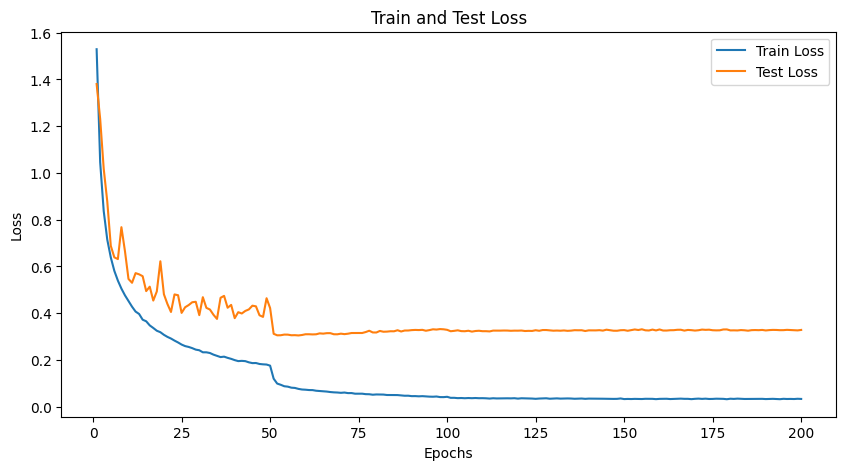

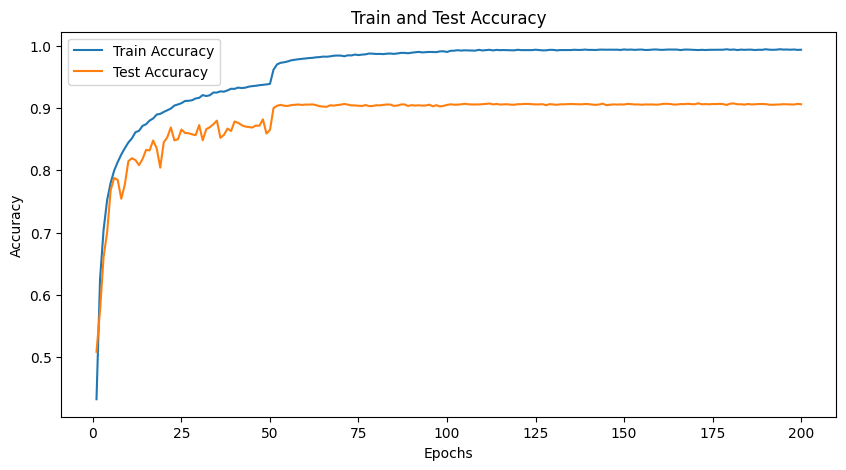

In [ ]:
def plot_history(train_loss_history, train_acc_history, test_loss_history, test_acc_history):
    epochs = len(train_loss_history)

    # Loss 그래프
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs+1), train_loss_history, label='Train Loss')
    plt.plot(range(1, epochs+1), test_loss_history, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Test Loss')
    plt.legend()
    plt.show()

    # Accuracy 그래프
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs+1), train_acc_history, label='Train Accuracy')
    plt.plot(range(1, epochs+1), test_acc_history, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train and Test Accuracy')
    plt.legend()
    plt.show()

# train_loss_history, train_acc_history, test_loss_history, test_acc_history에 대한 결과를 PLOT
plot_history(train_loss_history, train_acc_history, test_loss_history, test_acc_history)

#confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, data_loader, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy().tolist())
            y_pred.extend(preds.cpu().numpy().tolist())
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=16)
    plt.xlabel('True label', fontsize=14)
    plt.ylabel('Predicted label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    
# usage
plot_confusion_matrix(model, test_loader, classes)


In [ ]:
from sklearn.metrics import classification_report

def print_classification_report(model, data_loader, classes):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy().tolist())
            y_pred.extend(preds.cpu().numpy().tolist())
    
    report = classification_report(y_true, y_pred, target_names=classes)
    print(report)


support-분류 모델에서 각 클래스에 속하는 샘플의 수



In [ ]:
print_classification_report(model, test_loader, classes)


#GRAD-CAM

In [ ]:
from PIL import Image
import torchvision.models as models

In [ ]:
class CAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.activation_map = None
        self.gradient = None

        self.model.eval()

        self.register_hooks()

    def register_hooks(self):
        def backward_hook(module, grad_input, grad_output):
            self.gradient = grad_output[0]

        def forward_hook(module, input, output):
            self.activation_map = output.detach()

        target_layer = self.model._modules.get(self.target_layer)

        backward_hook_handle = target_layer.register_backward_hook(backward_hook)
        forward_hook_handle = target_layer.register_forward_hook(forward_hook)

        self.handles = [backward_hook_handle, forward_hook_handle]

        # 모델의 forward 연산을 한 번 실행하여 backward_hook을 등록합니다.
        _ = self.model(torch.zeros((1, 3, 32, 32)).to(next(self.model.parameters()).device))

    def remove_hooks(self):
        for handle in self.handles:
            handle.remove()

    def forward(self, input):
        return self.model(input)

    def backward(self, label):
        one_hot = torch.zeros_like(self.gradient)
        one_hot[0][label] = 1

        self.model.zero_grad()

        self.gradient.backward(gradient=one_hot, retain_graph=True)


 #DRNC26   
    def generate_cam(self, input, label):
        output = self.forward(input)
        if self.gradient is not None:
            self.backward(label)

        weights = list(self.model.parameters())[-2]
        weights = nn.functional.interpolate(weights.unsqueeze(-1).unsqueeze(-1), 
                                            size=(8, 8),  # DRNC26 모델의 출력 feature map 크기
                                            mode='bilinear', 
                                            align_corners=False)
        weights = weights.squeeze()

        # 해당 label에 대한 CAM을 만들기 위해, 해당 label에 대한 가중치만 추출합니다.
        # 예를 들어, 개에 대한 CAM을 만들기 위해, label=0에 대한 가중치만 추출합니다.
        weight = weights[label]

        cam = (weight * self.activation_map).sum(dim=1, keepdim=True)
        cam = nn.functional.relu(cam)

        cam = nn.functional.interpolate(cam, size=input.shape[2:], mode='bilinear', align_corners=False)
        cam -= cam.min()
        cam /= cam.max()

        return cam[0][0].detach().numpy()


def generate_cam(self, input, label):
    output = self.forward(input)
    if self.gradient is not None:
        self.backward(label)

    weights = list(self.model.parameters())[-2]
    weights = nn.functional.interpolate(weights.unsqueeze(-1).unsqueeze(-1),
                                        size=(input.shape[2], input.shape[3]),
                                        mode='bilinear',
                                        align_corners=False)
    weights = weights.squeeze()

    weight = weights[label]

    # 입력 이미지의 크기에 맞게 활성화 맵의 크기를 조정합니다.
    activation_map_resized = nn.functional.interpolate(self.activation_map, size=(input.shape[2], input.shape[3]), mode='bilinear', align_corners=False)

    cam = (weight * activation_map_resized).sum(dim=1, keepdim=True)
    cam = nn.functional.relu(cam)

    cam = nn.functional.interpolate(cam, size=(input.shape[2], input.shape[3]), mode='bilinear', align_corners=False)
    cam -= cam.min()
    cam /= cam.max()

    return cam[0][0].detach().numpy()



DRNC26

In [ ]:
# RESNET-50 모델을 생성합니다.
#model = models.resnet50(pretrained=True)
#model.fc = nn.Linear(model.fc.in_features, 10)  # CIFAR-10 클래스 수에 맞게 출력 레이어를 수정합니다.


model =DRNC26(num_classes=10)
model.fc = nn.Linear(model.fc.in_features, 10)  # CIFAR-10 클래스 수에 맞게 출력 레이어를 수정합니다.

# 학습된 모델 파라미터를 불러옵니다.
model.load_state_dict(torch.load('best_model.pth'))

# CAM 클래스를 생성합니다.
cam_generator = CAM(model, target_layer='layer3')


img = Image.open('/content/drive/MyDrive/DOG.PNG')
# 이미지의 채널 수가 3이 아닌 경우, RGB로 변환합니다.
if img.mode != 'RGB':
    img = img.convert('RGB')




# 이미지를 불러와서 전처리합니다.
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


img = transform(img).unsqueeze(0)


# 모델에 이미지를 입력하여 예측 결과와 CAM을 생성합니다.
output = model(img)
pred = output.argmax(dim=1).item()
cam_img = cam_generator.generate_cam(img, label=5)

# 결과를 시각화합니다.
plt.subplot(121)
plt.imshow(img.squeeze().permute(1, 2, 0).numpy())
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cam_img, cmap='jet')
plt.title('Class Activation Map')
plt.axis('off')
plt.show()


RESNET50

In [ ]:
input_image = Image.open(img)
input_image

#훈련된 모델로 추론시 해당 이미지와 가장 비슷한 (이미지 유사도가 가까운) 이미지 여러 개 (10개) 보여주는 기능 추가



#아무 이미지 저장해서 지정

In [ ]:
from PIL import Image

In [ ]:
image_path = '/content/drive/MyDrive/plane.PNG'

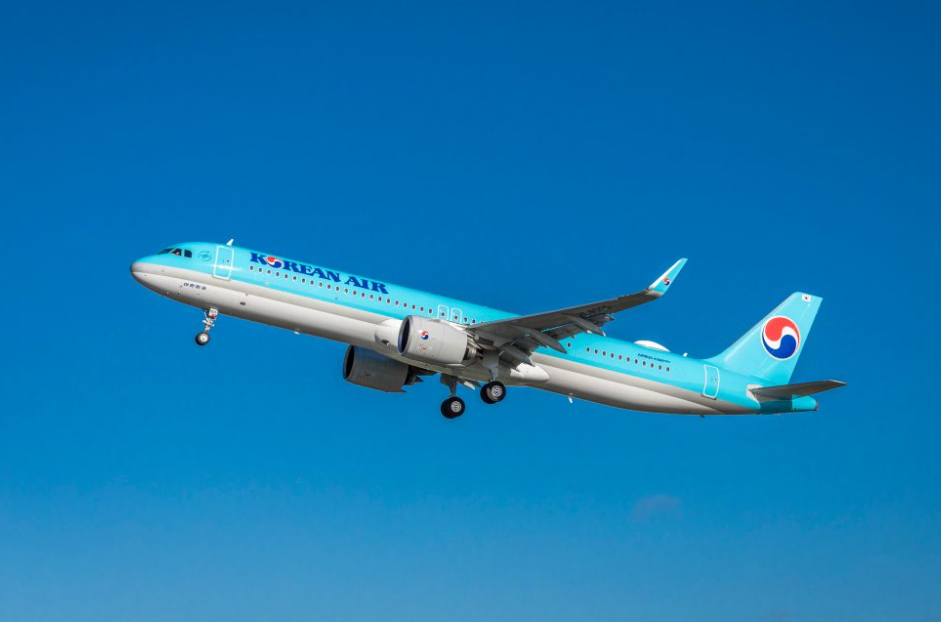

In [ ]:
input_image = Image.open(image_path)
input_image

아래 코드들은 다 실험용
get 함수가 포함되어있는 drnc26코드 돌려야함.

#유클리디안 거리(Euclidean distance)

#코사인 유사도(Cosine Similarity)

코사인 유사도는 두 벡터 간의 방향과 크기를 고려하여 유사도를 측정하는 지표입니다. 벡터의 크기에 영향을 받지 않고 벡터의 방향만을 고려하기 때문에 데이터 간의 각도 차이를 기반으로 유사도를 계산함



In [ ]:
import matplotlib.pyplot as plt

def show_similar_images(similar_images):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, ax in enumerate(axes.flatten()):
        image = similar_images[i].cpu().permute(1, 2, 0)  # 이미지의 차원 순서 변경 및 CPU로 이동
        image = (image + 1) / 2  # 이미지를 [0, 1] 범위로 정규화
        ax.imshow(image)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
# 두 특성 벡터 간의 L2거리사용

import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

def get_similar_images(model, image_path, num_images=10):
    # CIFAR-10 데이터셋 불러오기
    transform = transforms.Compose([
        transforms.Resize((32, 32)),  # 모델이 예상하는 크기로 이미지 크기 조정
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

    # 입력 이미지 전처리
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)

    # 입력 이미지를 모델이 사용하는 장치로 이동
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    input_tensor = input_tensor.to(device)

    # 입력 이미지를 모델에 전달하여 특성 벡터 추출
    model.eval()
    with torch.no_grad():
        features = model.get_activation_map(input_tensor)[-1]

    # 이미지 유사도 계산
    similarity_scores = []
    for i, (images, labels) in enumerate(testloader):
        images = images.to(device)
        features_i = model.get_activation_map(images)[-1]
        similarity_score = torch.norm(features - features_i).item()
        similarity_scores.append((similarity_score, images[0]))

    # 유사도에 따라 이미지 정렬
    similarity_scores.sort(key=lambda x: x[0], reverse=True)  # 유사도가 높은 순서로 변경
    similar_images = [image for _, image in similarity_scores[:num_images]]

    return similar_images

# 유사한 이미지 가져오기
similar_images = get_similar_images(model, image_path, num_images=10)



Files already downloaded and verified


In [ ]:
similar_images = get_similar_images(model, image_path, num_images=10)

Files already downloaded and verified


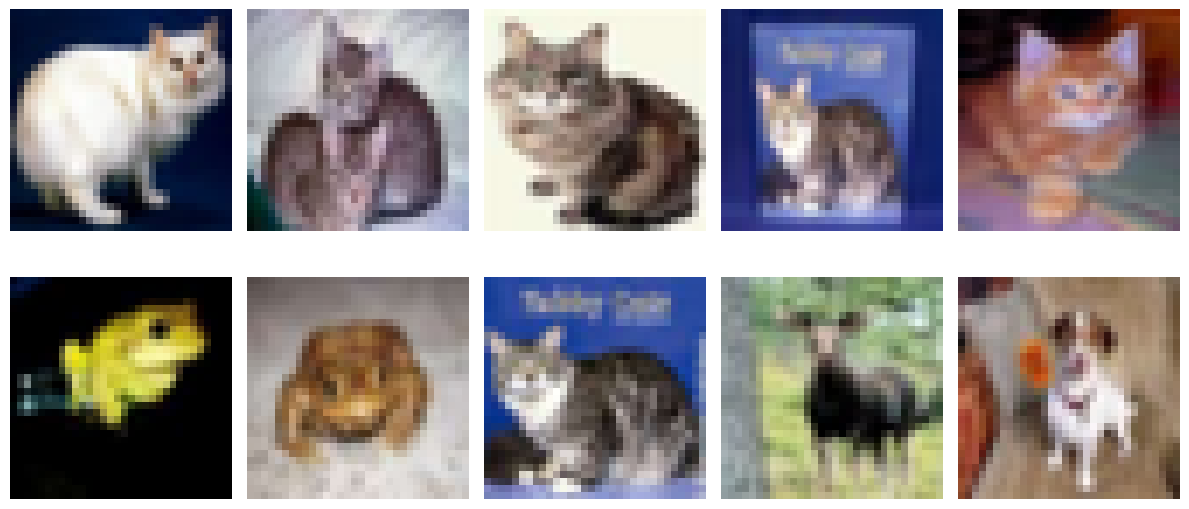

In [ ]:
show_similar_images(similar_images)

In [ ]:
def get_similar_images(model, image_path, num_images=10):
    # CIFAR-10 데이터셋 불러오기
    transform = transforms.Compose([
        transforms.Resize((32, 32)),  # 모델이 예상하는 크기로 이미지 크기 조정
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

    # 입력 이미지 전처리
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)

    # 입력 이미지를 모델이 사용하는 장치로 이동
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    input_tensor = input_tensor.to(device)

    # 입력 이미지를 모델에 전달하여 특성 벡터 추출
    model.eval()
    with torch.no_grad():
        activation_maps = model.get_activation_map(input_tensor)
        features = activation_maps[-1].squeeze()  # squeeze를 사용하여 차원 축소
        features = features.flatten()  # 벡터화하여 크기 일치

    # 이미지 유사도 계산
    similarity_scores = []
    for i, (images, _) in enumerate(testloader):
        images = images.to(device)
        activation_maps_i = model.get_activation_map(images)
        features_i = activation_maps_i[-1].squeeze()  # squeeze를 사용하여 차원 축소
        features_i = features_i.flatten()  # 벡터화하여 크기 일치
        similarity_score = torch.cosine_similarity(features.unsqueeze(0), features_i.unsqueeze(0)).item()
        similarity_scores.append((similarity_score, images[0]))

    # 유사도에 따라 이미지 정렬
    similarity_scores.sort(key=lambda x: x[0], reverse=True)
    similar_images = [image for _, image in similarity_scores[:num_images]]

    return similar_images


# 유사한 이미지 가져오기
similar_images = get_similar_images(model, image_path, num_images=10)



Files already downloaded and verified


In [ ]:
similar_images = get_similar_images(model, image_path, num_images=10)

Files already downloaded and verified


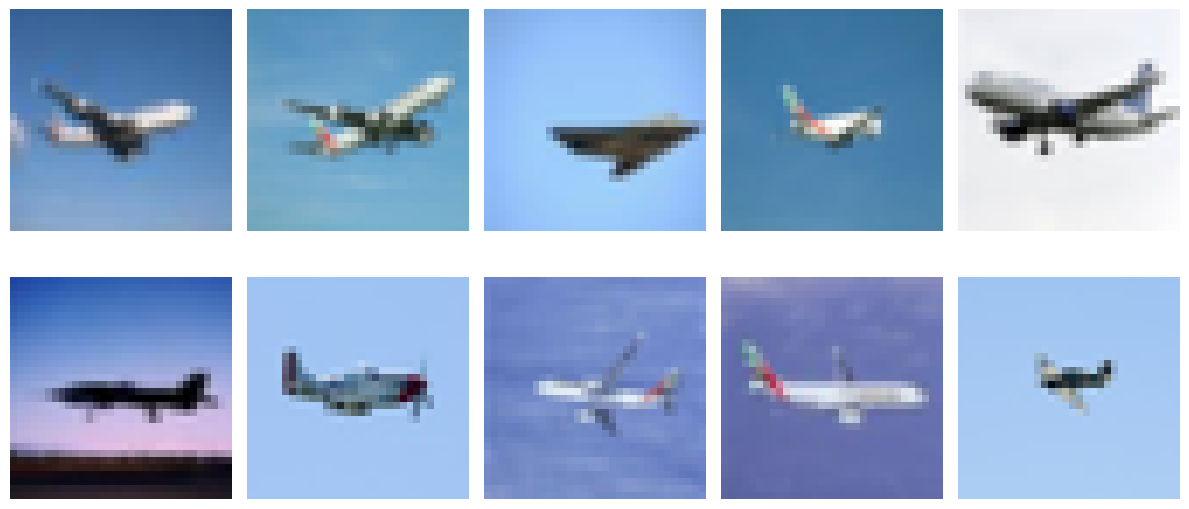

In [ ]:
show_similar_images(similar_images)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

def get_similar_images_with_prob(model, image_path, num_images=10):
    # CIFAR-10 데이터셋 불러오기
    transform = transforms.Compose([
        transforms.Resize((32, 32)),  # 모델이 예상하는 크기로 이미지 크기 조정
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

    # 입력 이미지 전처리
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)

    # 입력 이미지를 모델이 사용하는 장치로 이동
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    input_tensor = input_tensor.to(device)

    # 입력 이미지를 모델에 전달하여 특성 벡터 추출
    model.eval()
    with torch.no_grad():
        activation_maps = model.get_activation_map(input_tensor)
        features = activation_maps[-1].squeeze()  # squeeze를 사용하여 차원 축소
        features = features.flatten()  # 벡터화하여 크기 일치

    # 이미지 유사도 및 클래스 확률 계산
    similarity_scores = []
    for i, (images, labels) in enumerate(testloader):
        images = images.to(device)
        activation_maps_i = model.get_activation_map(images)
        features_i = activation_maps_i[-1].squeeze()  # squeeze를 사용하여 차원 축소
        features_i = features_i.flatten()  # 벡터화하여 크기 일치
        similarity_score = torch.cosine_similarity(features.unsqueeze(0), features_i.unsqueeze(0)).item()
        class_prob = torch.nn.functional.softmax(model(images), dim=1)[0, labels[0]].item()
        similarity_scores.append((similarity_score, class_prob, images[0]))

    # 유사도 및 확률에 따라 이미지 정렬
    similarity_scores.sort(key=lambda x: x[0], reverse=True)
    similar_images = [(image, class_prob) for _, class_prob, image in similarity_scores[:num_images]]

    return similar_images

# 유사한 이미지와 해당 클래스에 속할 확률 가져오기
similar_images_with_prob = get_similar_images_with_prob(model, image_path, num_images=10)


Files already downloaded and verified


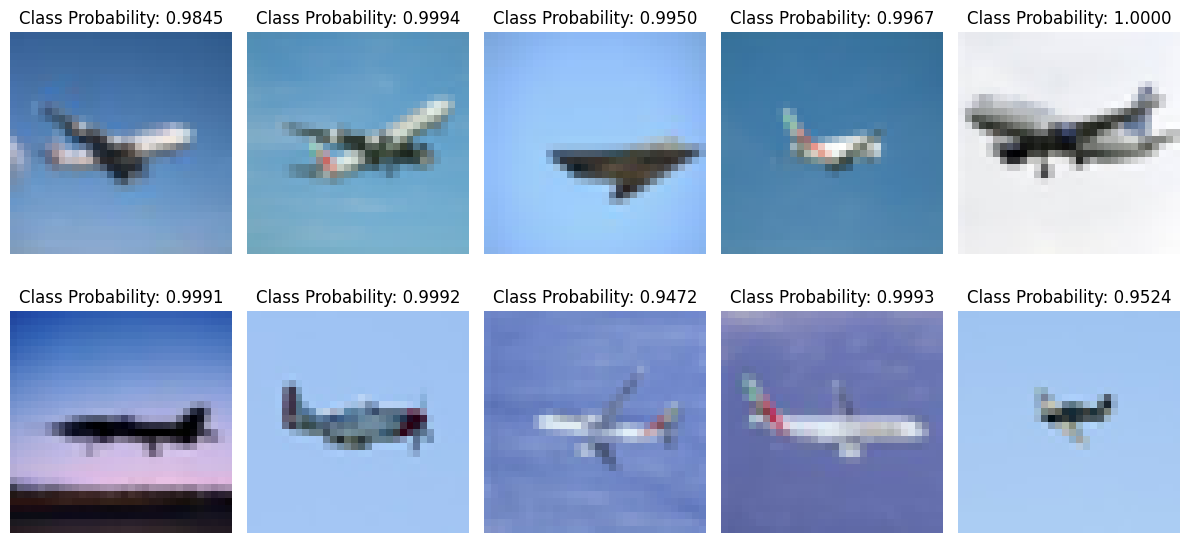

In [ ]:
import matplotlib.pyplot as plt

def show_similar_images_with_prob(similar_images_with_prob):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, (image, class_prob) in enumerate(similar_images_with_prob):
        image = image.permute(1, 2, 0)  # 이미지의 차원 순서 변경
        image = (image + 1) / 2  # 이미지를 [0, 1] 범위로 정규화
        image = image.cpu()  # 이미지를 CPU로 이동
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(f'Class Probability: {class_prob:.4f}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 유사한 이미지와 해당 클래스에 속할 확률 시각화
show_similar_images_with_prob(similar_images_with_prob)
